
# Investigate a movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Cleaning">Data Cleaning</a></li>   
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>**In this project i will analyze and investigate a dataset about movies to answer my questions :**

1.Which genres are most popular? 

2.Is there a positive correlation between the budget of the movie and the reveneu?
 
3.Which year has most released movies?

4.What is the movie that has the highest budget?

In [1]:
#import statements for all of the packages that i will use
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
#Read the data and print out a few lines, to see how my data looks like
df=pd.read_csv('tmdb-movies.csv')
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [3]:
# by using info method, to see all the column names and if there is any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#count the null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

##### After viewing my data closely I noticed that there is a lot of null values ,also i need to clean the columns that i will use and then drop the rest of it

<a id='Cleaning'></a>
## Data Cleaning 

**The issues that i want to fix:**

1.Drop the columns that i will not use.

2.The genres column has a lot of genres in each movie, i want to take only the first one.

3.Dealing with duplicate and missing valuse





In [5]:
# drop the columns that i will not use
df.drop(['cast','homepage','overview','director','imdb_id','tagline','keywords','production_companies','revenue_adj','budget_adj','vote_average'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
release_year      10866 non-null int64
dtypes: float64(1), int64(6), object(3)
memory usage: 849.0+ KB


In [7]:
#the genres column has a lot of genres in each movie, i want to take only the first one
df['genres']=df['genres'].str.split('|',1,expand=True)
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action,6/9/15,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,5/13/15,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure,3/18/15,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,12/15/15,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action,4/1/15,2947,2015


In [8]:
#dealing with duplicate and missing valuse
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
runtime           0
genres            0
release_date      0
vote_count        0
release_year      0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 :Which genres are most popular in movies?

Text(0, 0.5, '# of movies')

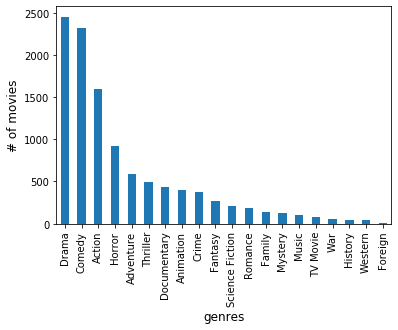

In [9]:
## I think most effective way to see that by plotting the genres.
axx=df.genres.value_counts().plot(kind='bar')
axx.set_xlabel("genres",fontsize=12)
axx.set_ylabel("# of movies",fontsize=12)

It is obvious that the drama and comedy movies are the most popular genres.

### Research Question 2 : is there a positive correlation between the budget of the movie and the reveneu?

In [10]:
#by using (.corr), and set up method to 'pearson' becouse the values are numbers not ordinal values
corr1=df[['budget','revenue']]
corr2=corr1.corr(method='pearson')
corr2

,budget,revenue
budget,1.000000,0.734851
revenue,0.734851,1.000000


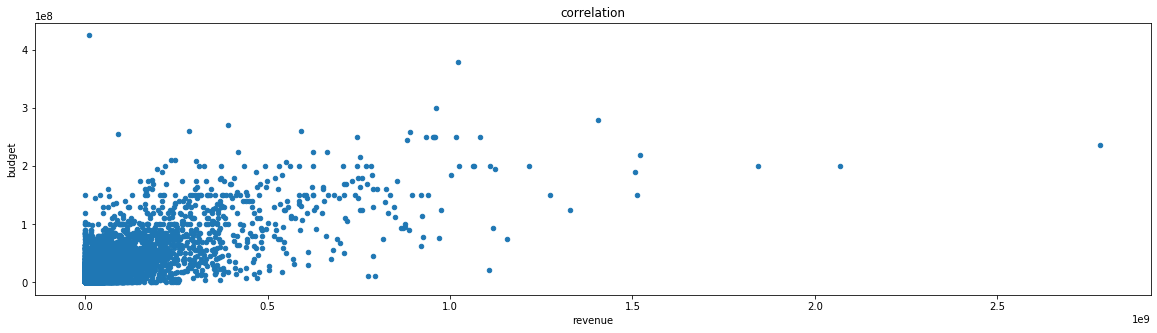

In [11]:
#plotting it will make it more clear
df.plot(x='revenue',y='budget',kind='scatter',title='correlation',figsize=(20,5))

So the correlation is positive and strong ,thats means the higher the budget, the higher the revenue becomes

### Research Question 3  : which year has most released movies?

Text(0, 0.5, 'released movies')

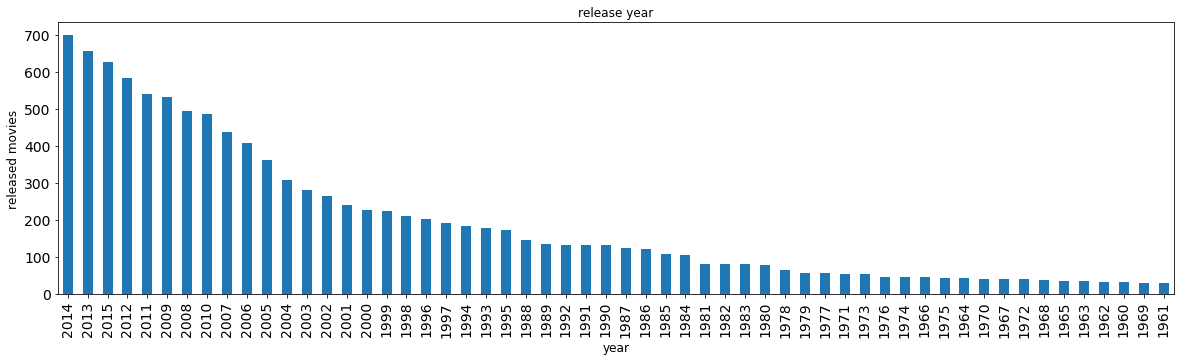

In [12]:
# also here I think most effective way to see that by plotting the release_year.
ax=df.release_year.value_counts().plot(kind='bar',title='release year',figsize=(20,5),fontsize=14)
ax.set_xlabel("year",fontsize=12)
ax.set_ylabel("released movies",fontsize=12)

We can see that 2014 was most released movies , it's about 700 movie

### Research Question 4  : What is the movie that has the highest budget?

In [13]:
#searching for the maximum value in budget column
df[df['budget']==df['budget'].max()]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,release_year
2244,46528,0.25054,425000000,11087569,The Warrior's Way,100,Adventure,12/2/10,74,2010


so The Warrior's Way is the highest budget movie, it's about 425000000$

### Conclusions

<a id='conclusions'></a>
In conclusion I think I am satisfied with my findings, I was wondring about many questions but now I know the answers.

First I wanted to know Which genres are most popular in movies,I found that it is drama in first place then comedy then action.

Second I wanted to know if there is a positive correlation between the budget of the movie and the reveneu, i calculate it,the result was 0.73, it is a strong positive correlatuon.

Also i wanted to know which year has most released movies, it was 2014.

Finally i was curious What is the movie that has the highest budget?, now i know it is The warrior's way.

### Limitations

I think my findings not that accurate,because the data had missing values,and i dropped some of the rows.

Also i actually faced a little problem in geners column,it was more than one genre to each movie,so that maybe decrease the quality of the results.
and when i was analysing the correlartion i find it a littel bit hard to me to choose the perfect plot.